In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# 한글 쓰는 방법
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = "/System/Library/Fonts/AppleSDGothicNeo.ttc"
font_name = fm.FontProperties(fname=font_location).get_name()
print(font_name)
matplotlib.rc('font', family=font_name)

Apple SD Gothic Neo


/var/folders/k4/qhbh8yls6h349rdp_mfbt60w0000gn/T/ipykernel_58654/206075750.py:4: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


In [3]:
import os
# 현재 working directory 확인 방법
print(os.getcwd()) # 주피터에서
#pwd # 터미널에서 
# 데이터 있는 경로 확인
path = "/Users/jungtaekchoi/Google Drive/My Drive/fastcamp/datas"
# 경로 바꾸는 방법
os.chdir(path)
# 리스트 목록 확인
!ls

/Volumes/GoogleDrive/My Drive/fastcamp/MGS_AI_4/dev/Fastcampus-EDA/cjt
Fastcampus_data_after_cleaning.csv
country.csv
sakila-data.sql
sakila-schema.sql
world.sql
수업.sql
수업2-2.sql
수업2.sql
데이터분석프로젝트_VER2_210329_210926.xlsx


In [4]:
df = pd.read_csv(path + "/Fastcampus_data_after_cleaning.csv")
#df.dropna()

,Unnamed: 0,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
1,1,970650,432862.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,없음,0.0,116000.0,TOSS,CARD,영상 편집,2020-12-02 00:00:00
2,2,970657,72297.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,TOSS,CARD,없음,2021-03-04 00:00:00
3,3,970656,72297.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,없음,0.0,190900.0,TOSS,CARD,없음,2021-03-04 00:00:00
4,4,970658,478028.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,TOSS,CARD,PPT/보고서,2019-11-14 00:00:00
5,5,970655,478028.0,ORDER,CANCELLED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:56,97500,없음,0.0,117500.0,TOSS,CARD,PPT/보고서,2019-11-14 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105390,105414,1364995,640697.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15 00:00:00
105391,105415,1364998,670896.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,없음,0.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10 00:00:00
105392,105416,1364996,640697.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15 00:00:00
105393,105417,1365005,670896.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,없음,0.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10 00:00:00


### Q1. 결재와 취소한 고객들

### Note : set 사용 
    - 중복 사라짐 --> 반복 결재에 대한 파악은 불가능.
    - 어떤 고객이 구매 취소했는지 파악에 집중

In [6]:
### 데이터 선택
complete = set(list(df[(df.type == "PAYMENT") & (df.state == "COMPLETED")].customer_id))
cancalled = set(list(df[(df.type == "PAYMENT") & (df.state == "CANCELLED")].customer_id))

In [7]:
### 차집합, 합집합 확인
complement = list(set(complete).difference(cancalled))
intersection = list(complete.intersection(cancalled))
print(f"차집합 : {len(complement)}")
print(f"합집합 : {len(intersection)}")

차집합 : 36506
합집합 : 3010


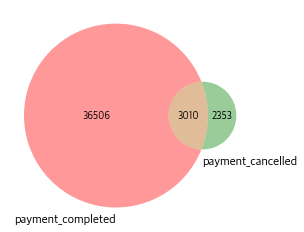

In [8]:
### 시각화
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted

set1 = set(complete)
set2 = set(cancalled)

venn2([set1, set2], ('payment_completed', 'payment_cancelled'))
plt.show()

### A1. 
    - 3010명이 구매 후 결재 취소 
    - 2352명의 구매 취소는 받은 데이터 이전에 구매한 사람이 취소한 것으로 이해된다.

In [10]:
# 쿠폰은 없는데 판매가 결재금액과 다르면 포인트라고 지정해주자
df.loc[(df.transaction_amount != df.sale_price) & 
       (df.coupon_title == "없음") &
       (df.type == "PAYMENT") &
       (df.state == "COMPLETED"), "coupon_title"] = "포인트"

In [11]:
# (df.type == "ORDER") & (df.state == "COMPLETED")인 경우는 날리자
df[(df.type == "ORDER") &
   (df.state == "COMPLETED")]

df[(df.type == "ORDER")].state.value_counts()

CANCELLED    34122
COMPLETED     6035
Name: state, dtype: int64

In [12]:
target_df = df[(df.type == "PAYMENT") & (df.state == "COMPLETED")]
#target_df[target_df.category_title == "관리"]

In [13]:
target_df[target_df.marketing_start_at.isnull()]

,Unnamed: 0,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
18,18,970682,478031.0,PAYMENT,COMPLETED,프로모션 : 기초부터 시작하는 데이터분석 한끝세트 (3월 프리패스),데이터사이언스,올인원,2021-03-28 15:33:28,299000,없음,0.0,299000.0,TOSS,CARD,없음,NaN
46,46,970740,474451.0,PAYMENT,COMPLETED,올인원 패키지 : 디지털 마케팅 MAX 2020,마케팅,올인원,2021-03-28 16:28:42,114500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,134500.0,TOSS,CARD,디지털마케팅,NaN
48,48,970750,478091.0,PAYMENT,COMPLETED,프로모션 : 매출의 판도를 바꾸는 마케팅 한끝세트 (3월 프리패스),마케팅,올인원,2021-03-28 16:35:04,299000,없음,0.0,299000.0,TOSS,CARD,없음,NaN
57,57,970789,478098.0,PAYMENT,COMPLETED,프로모션 : 코딩 LEVEL UP 웹 개발 풀스텍 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-28 16:52:29,299000,없음,0.0,299000.0,TOSS,CARD,없음,NaN
64,64,970819,478118.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 반복 업무 자동화,업무 생산성,올인원,2021-03-28 17:06:49,99000,없음,0.0,99000.0,TOSS,CARD,업무자동화,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105351,105375,1364758,225684.0,PAYMENT,COMPLETED,"올인원 패키지 : 김기현의 BERT, GPT-3를 활용한 자연어처리",데이터사이언스,올인원,2021-09-25 08:51:57,218000,없음,0.0,218000.0,INICIS,VBANK,딥러닝/인공지능,NaN
105368,105392,1364863,666665.0,PAYMENT,COMPLETED,(B2B) K-Digital Credit 머신러닝 & AI 첫걸음 시작하기_6기,프로그래밍,B2G,2021-09-25 11:21:54,30000,없음,0.0,30000.0,INICIS,CARD,없음,NaN
105381,105405,1364925,670842.0,PAYMENT,COMPLETED,(B2B) K-Digital Credit Java & SpringBoot로 시작하는...,프로그래밍,B2G,2021-09-25 12:24:09,40000,없음,0.0,40000.0,INICIS,CARD,없음,NaN
105382,105406,1364929,120686.0,PAYMENT,COMPLETED,[한정판매] 자연어 A-Z 끝장 패키지(~9월),데이터사이언스,올인원,2021-09-25 12:29:39,481000,없음,0.0,481000.0,INICIS,CARD,없음,NaN


In [14]:
target_df.loc[: , 'completed_at'] = pd.to_datetime(target_df['completed_at'], yearfirst=True)
target_df.loc[: , 'marketing_start_at'] = pd.to_datetime(target_df['marketing_start_at'], yearfirst=True)

/var/folders/k4/qhbh8yls6h349rdp_mfbt60w0000gn/T/ipykernel_58654/1773972016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df.loc[: , 'completed_at'] = pd.to_datetime(target_df['completed_at'], yearfirst=True)
/var/folders/k4/qhbh8yls6h349rdp_mfbt60w0000gn/T/ipykernel_58654/1773972016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df.loc[: , 'marketing_start_at'] = pd.to_datetime(target_df['marketing_start_at'], yearfirst=True)


In [15]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52899 entries, 2 to 105394
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0              52899 non-null  int64         
 1   id                      52899 non-null  int64         
 2   customer_id             52899 non-null  float64       
 3   type                    52899 non-null  object        
 4   state                   52899 non-null  object        
 5   course_title            52899 non-null  object        
 6   category_title          52899 non-null  object        
 7   format                  52899 non-null  object        
 8   completed_at            52899 non-null  datetime64[ns]
 9   transaction_amount      52899 non-null  int64         
 10  coupon_title            52899 non-null  object        
 11  coupon_discount_amount  52899 non-null  float64       
 12  sale_price              52899 non-null  float

In [16]:
### seasonality whenever there is a regular, periodic change in the mean of the series.
### repetitions over a day, a week, or a year are common

In [17]:
ctg_df = target_df.groupby(["category_title"]).resample("d", on = "completed_at").sum()#.unstack(level = 0)

In [18]:
ctg_df = ctg_df["transaction_amount"]

In [19]:
ctg_df

category_title  completed_at
관리              2021-05-12        150000
교육              2021-03-29       9434000
                2021-03-30       7700000
                2021-03-31      10472150
                2021-04-01      23513975
                                  ...   
프로그래밍           2021-09-21       8935300
                2021-09-22      14106700
                2021-09-23      12008800
                2021-09-24      11140000
                2021-09-25       2794000
Name: transaction_amount, Length: 2046, dtype: int64

In [20]:
sub_name = list(ctg_df.index.get_level_values(0).unique())

In [21]:
sub_name

['관리',
 '교육',
 '데이터사이언스',
 '디자인',
 '마케팅',
 '부동산/금융',
 '비즈니스',
 '업무 생산성',
 '영상/3D',
 '지식콘텐츠',
 '크리에이티브',
 '투자/재테크',
 '파이낸스',
 '프로그래밍']

In [22]:
# 그래프 표현
plt.rc('axes', unicode_minus=False)
result = seasonal_decompose(ctg_df[sub_name], period=30)
#result.plot()

카테고리 = 관리 : 길이 너무 짧아서 패스
카테고리 = 파이낸스 : 길이 너무 짧아서 패스


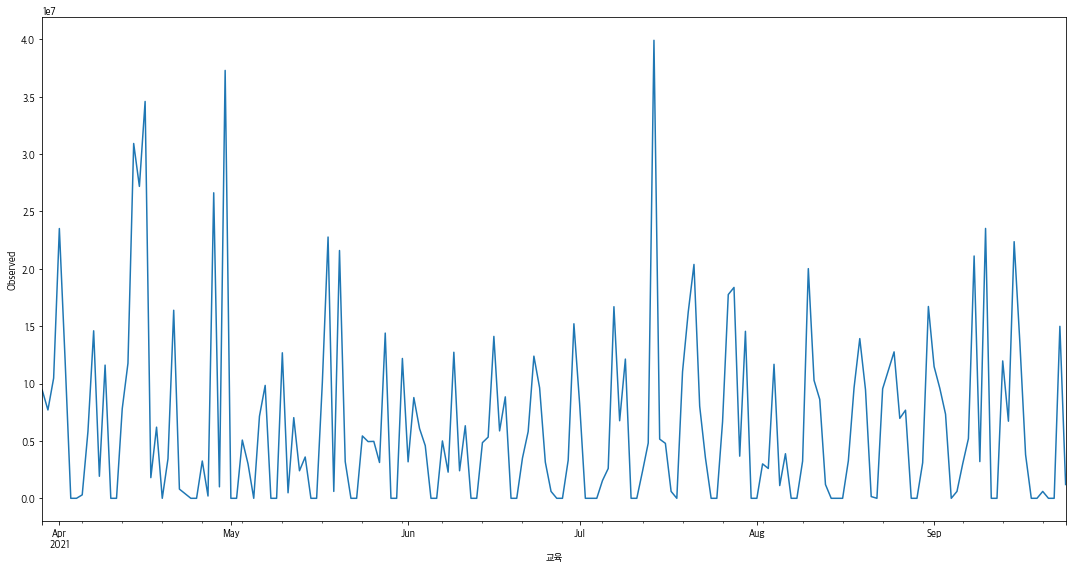

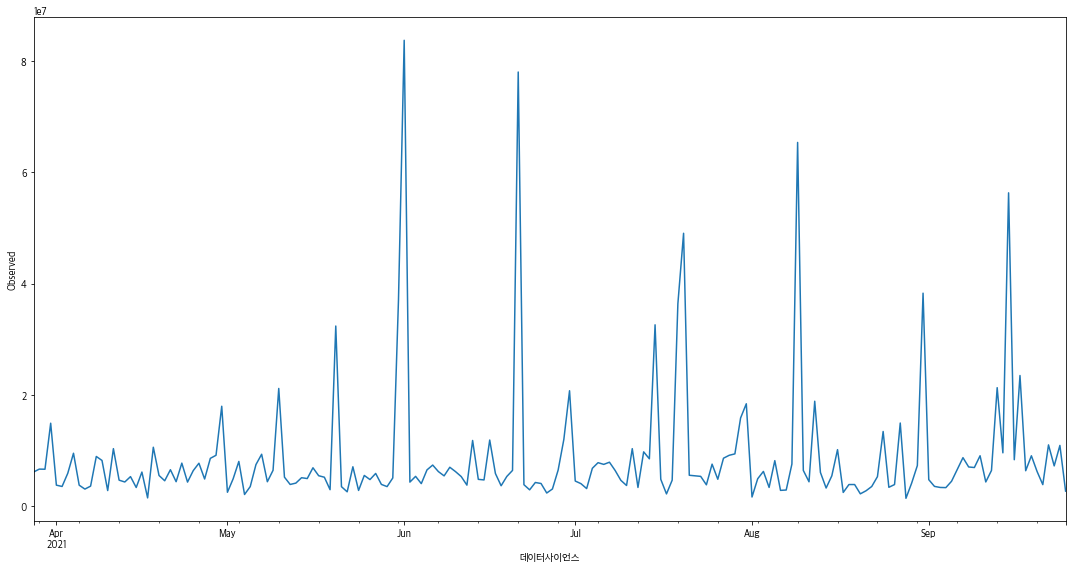

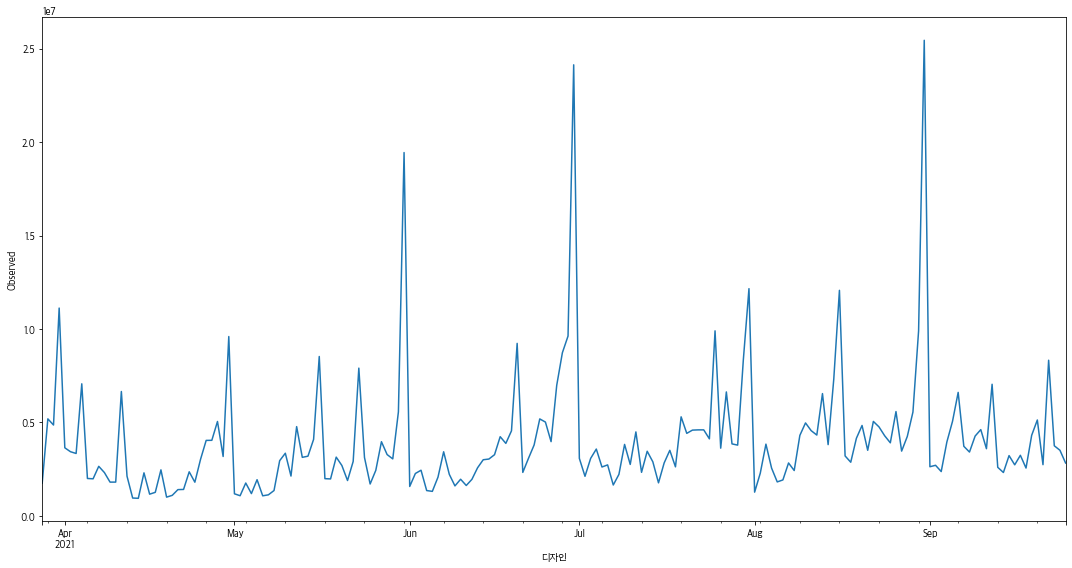

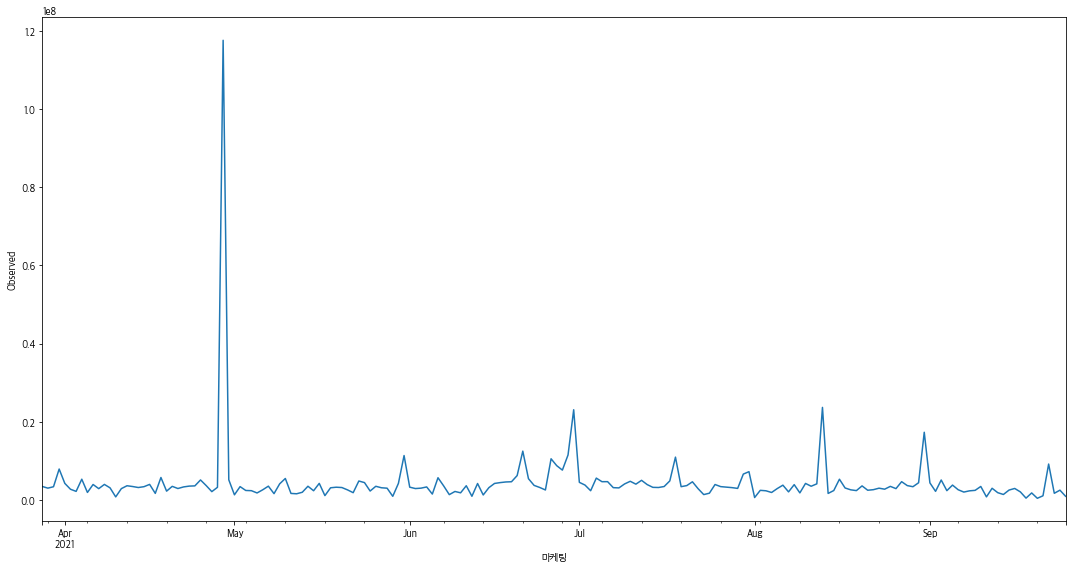

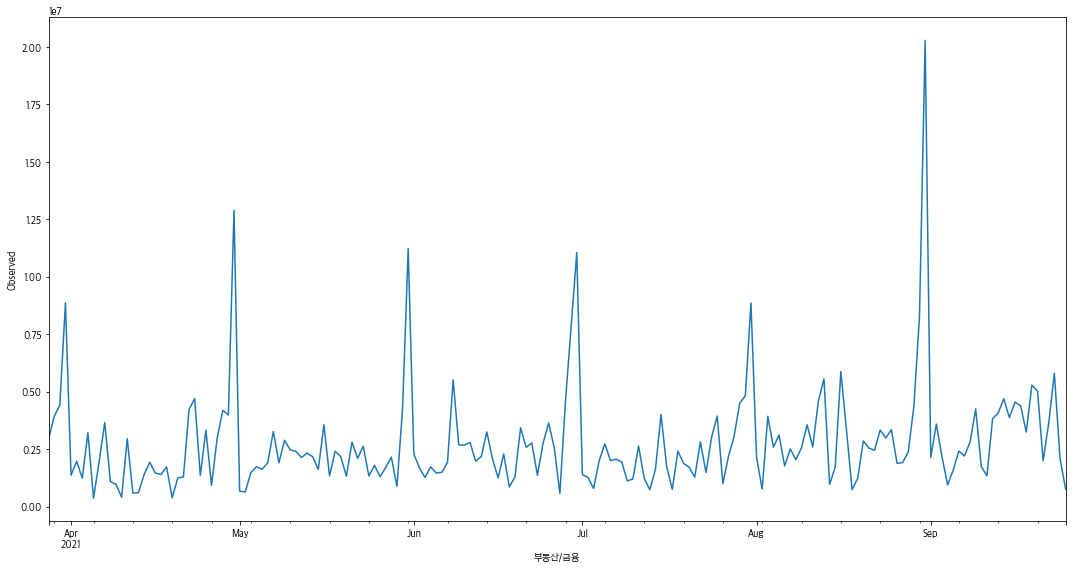

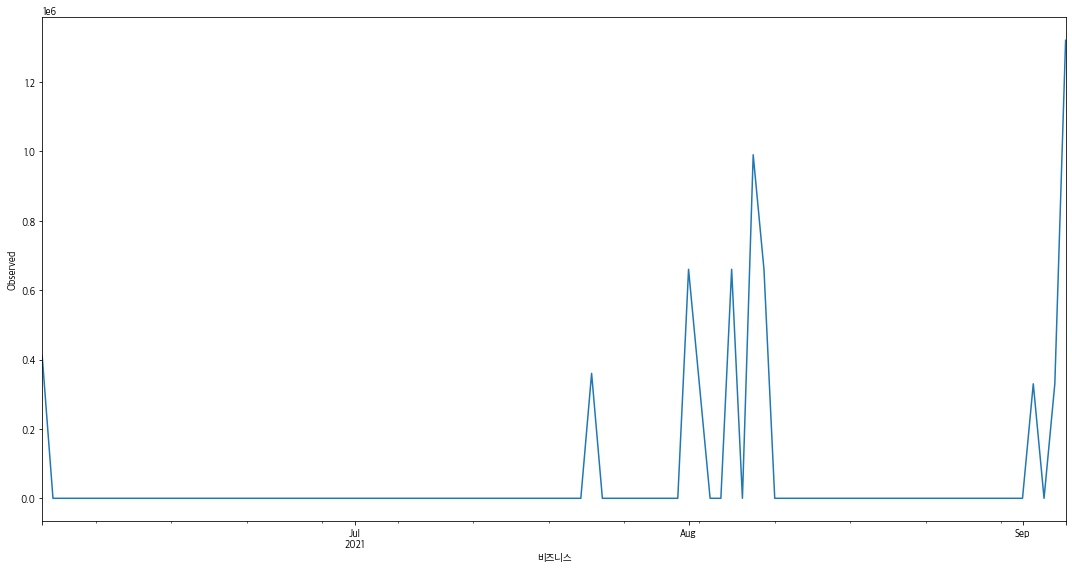

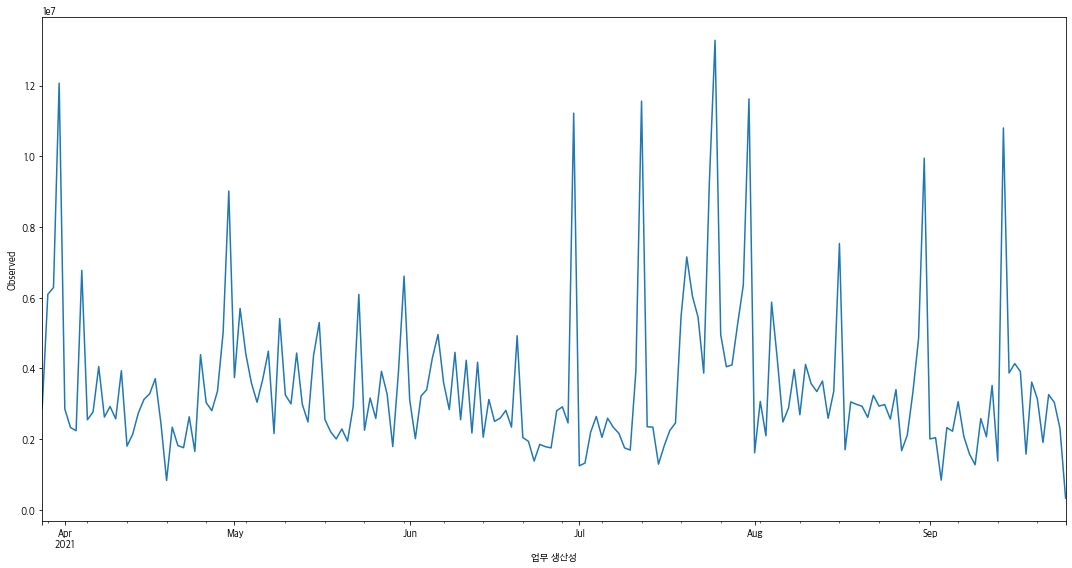

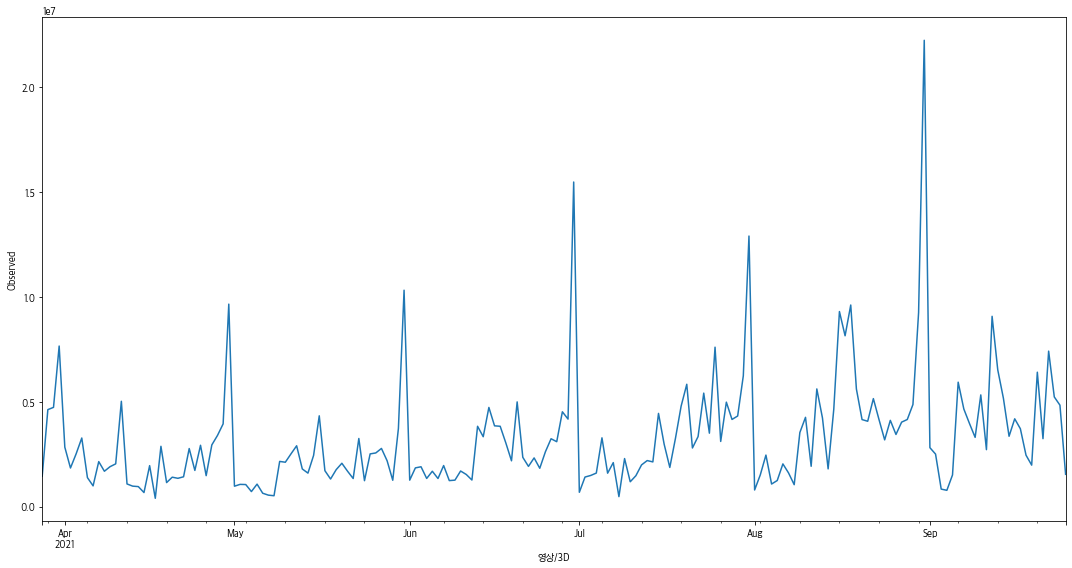

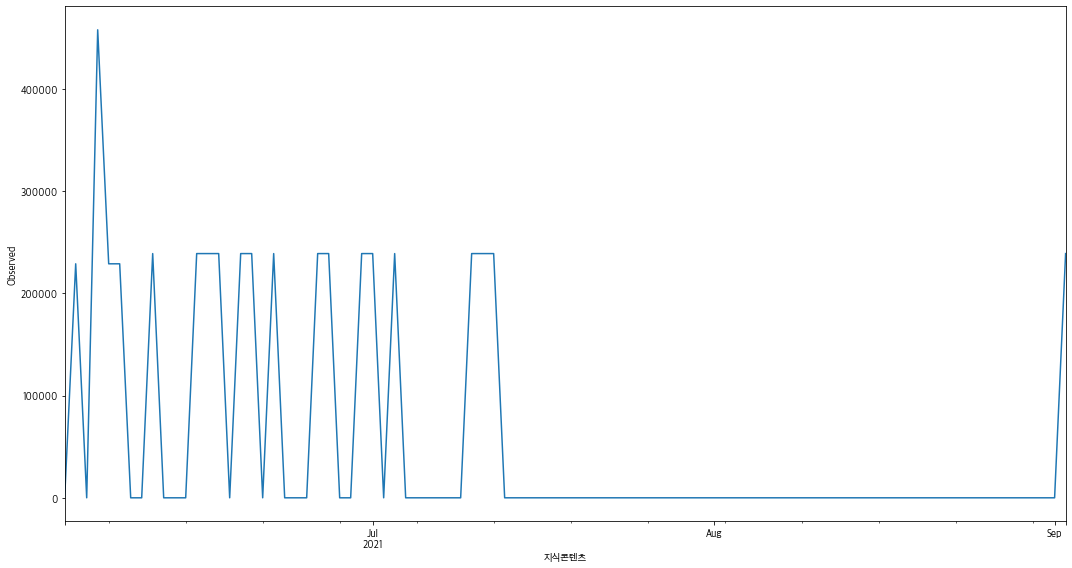

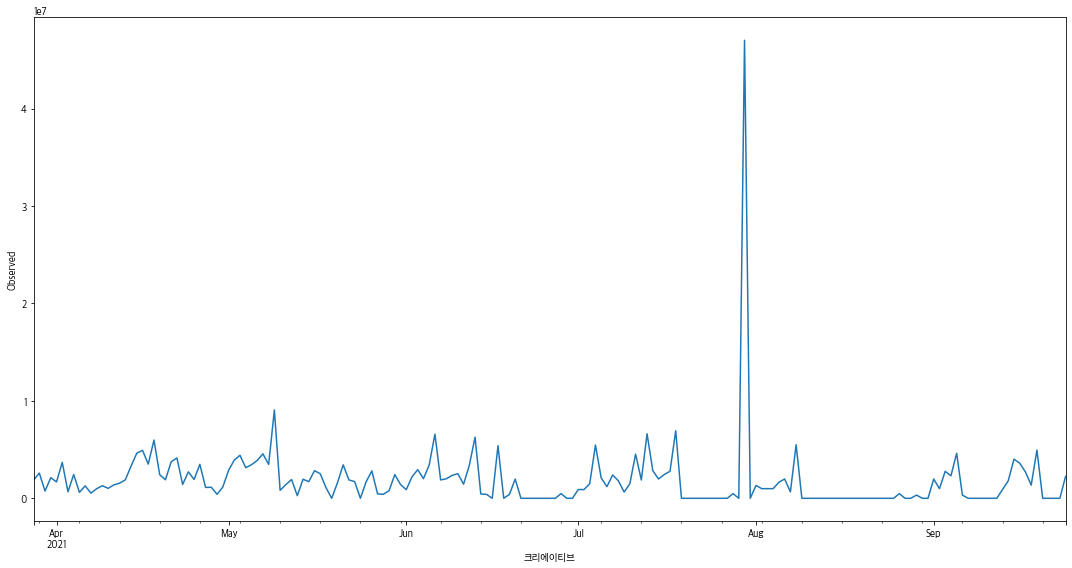

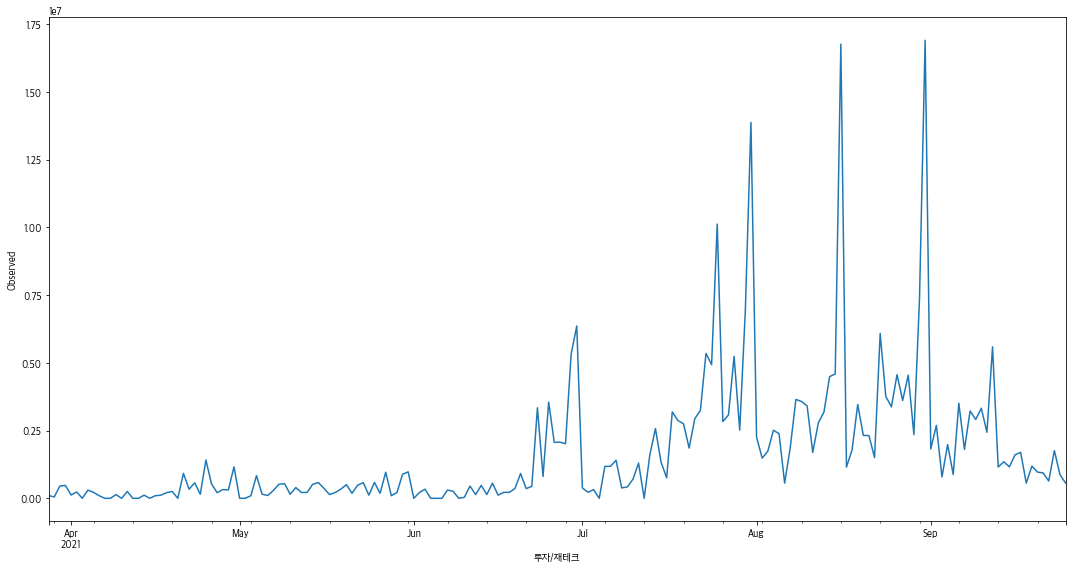

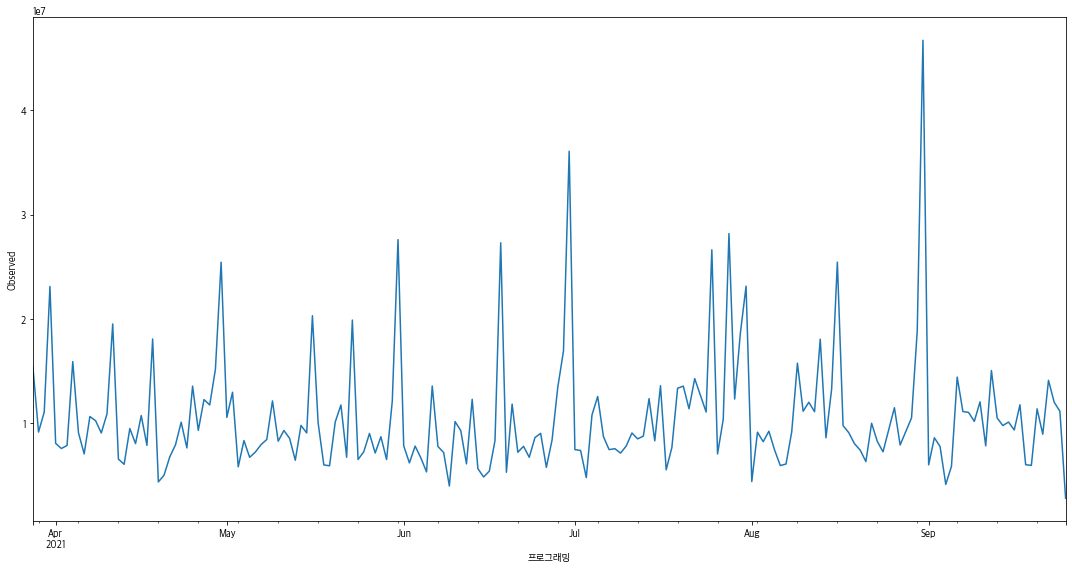

In [23]:
def plot_observed(result, category_name) : 
    fig, ax1 = plt.subplots(1,1, figsize = (15,8))
    result.observed.plot(legend = False, ax = ax1)
    ax1.set_ylabel('Observed')
    ax1.set_xlabel(category_name)
    
for sub in sub_name :
    ctg_df.loc[sub, :]
    target_df = pd.DataFrame(ctg_df.loc[sub, :])
    try : 
        target_df.rename(columns = { "transaction_amount" : sub}, inplace = True )
        plt.rc('axes', unicode_minus=False)
        result = seasonal_decompose(target_df[sub], period=30)
        plot_observed(result, sub)
        plt.tight_layout()
        
    except ValueError: 
        print(f"카테고리 = {sub} : 길이 너무 짧아서 패스")
        continue

In [ ]:
def plot_trend(result, category_name) : 
    fig, ax1 = plt.subplots(1,1, figsize = (15,8))
    result.trend.plot(legend = False, ax = ax1)
    ax1.set_ylabel('Trend')
    ax1.set_xlabel(category_name)
    
for sub in sub_name :
    ctg_df.loc[sub, :]
    target_df = pd.DataFrame(ctg_df.loc[sub, :])
    try : 
        target_df.rename(columns = { "transaction_amount" : sub}, inplace = True )
        plt.rc('axes', unicode_minus=False)
        result = seasonal_decompose(target_df[sub], period=30)
        plot_trend(result, sub)
        plt.tight_layout()
        
    except ValueError: 
        print(f"카테고리 = {sub} : 길이 너무 짧아서 패스")
        continue

In [ ]:
def plot_seasonal(result, category_name) : 
    fig, ax1 = plt.subplots(1,1, figsize = (15,8))
    result.seasonal.plot(legend = False, ax = ax1)
    ax1.set_ylabel('Seasonal')
    ax1.set_xlabel(category_name)

for sub in sub_name :
    ctg_df.loc[sub, :]
    target_df = pd.DataFrame(ctg_df.loc[sub, :])
    try : 
        target_df.rename(columns = { "transaction_amount" : sub}, inplace = True )
        plt.rc('axes', unicode_minus=False)
        result = seasonal_decompose(target_df[sub], period=30)
        plot_seasonal(result, sub)
        plt.tight_layout()
        
    except ValueError: 
        print(f"카테고리 = {sub} : 길이 너무 짧아서 패스")
        continue

In [ ]:
def plot_resid(result, category_name) : 
    fig, ax1 = plt.subplots(1,1, figsize = (15,8))
    result.resid.plot(legend = False, ax = ax1)
    ax1.set_ylabel('Residual')
    ax1.set_xlabel(category_name)

for sub in sub_name :
    ctg_df.loc[sub, :]
    target_df = pd.DataFrame(ctg_df.loc[sub, :])
    try : 
        target_df.rename(columns = { "transaction_amount" : sub}, inplace = True )
        plt.rc('axes', unicode_minus=False)
        result = seasonal_decompose(target_df[sub], period=30)
        plot_resid(result, sub)
        plt.tight_layout()
        
    except ValueError: 
        print(f"카테고리 = {sub} : 길이 너무 짧아서 패스")
        continue

In [ ]:
## 계절성 있다 없다 판단의 기준을 정해보자
## 월말 & 월초의 매출이 : 25일 기준으로 

In [ ]:
### 결재총량을 가격으로 보고 nan값을 확인
### nan값 의미 = 그 날 한번도 결재가 없었던 날
#pd.DataFrame(ctg_df)
pd.DataFrame(ctg_df).unstack(level=0).isnull().sum()

In [ ]:
# "관리" 포맷 = ['관리']
# 삭제 
df[(df.category_title == "관리") & (df.type == "PAYMENT") & (df.state == "COMPLETED")]#.format.unique()

In [ ]:
# "교육" 포맷 = ['B2B 온라인', 'B2B']
# 교욱은 무조건 기업 대상이구나.
df[(df.category_title == "교육") & (df.type == "PAYMENT") & (df.state == "COMPLETED")]#.format.unique()

In [ ]:
# "지식콘텐츠" 포맷 = ['MBA']
# MBA는 학교 대상. 결국 B2B
# 지식콘텐츠도 결국은 기업 대상이다.
df[(df.category_title == "지식콘텐츠") & (df.type == "PAYMENT") & (df.state == "COMPLETED")].format.unique()

In [ ]:
# "비즈니스" 포맷 = ['하루10분컷', '온라인 완주반', 'B2B 온라인', '올인원']
df[(df.category_title == "비즈니스") & (df.type == "PAYMENT") & (df.state == "COMPLETED")].format.unique()

In [ ]:
# "크리에이티브" 포맷 = ['올인원', '온라인 완주반', 'B2B 온라인', '이벤트', '아카이브', 'B2B']
# 아카이브는 모지??
# 무시
df[(df.category_title == "크리에이티브") & (df.type == "PAYMENT") & (df.state == "COMPLETED")]#.format.unique()

In [ ]:
# "파이낸스" 포맷 = ['B2B 온라인', '올인원']
df[(df.category_title == "파이낸스") & (df.type == "PAYMENT") & (df.state == "COMPLETED")].format.unique()

In [ ]:
# 파이낸스 포맷 = ['B2B 온라인', '올인원']
# B2B 온라인 : 결재 한번만 존재
# 올인원 : 프로모션이 있는 월초에만 구매가 일어났구나 
df[(df.category_title == "파이낸스") & (df.type == "PAYMENT") | (df.type == "REFUND")].format.unique() (df.type == "PAYMENT") & (df.state == "COMPLETED")

In [ ]:
df[df.format.str.contains("MBA")].format = "B2S"

In [ ]:
df.format.unique()

In [ ]:
df[df.format.str.contains("B2")].category_title.unique()

In [ ]:
def plot_decompose(result, category_name) : 
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize = (15,8))
    result.observed.plot(legend = False, ax = ax1)
    ax1.set_ylabel('Observed')
    ax1.set_xlabel(category_name)
    
    result.trend.plot(legend = False, ax = ax2)
    ax2.set_ylabel('Trend')
    ax1.set_xlabel(category_name)
    
    result.seasonal.plot(legend = False, ax = ax3)
    ax3.set_ylabel('Seasonal')
    ax1.set_xlabel(category_name)
    
    result.resid.plot(legend = False, ax = ax4)
    ax4.set_ylabel('Residual')
    ax1.set_xlabel(category_name)

for sub in sub_name :
    ctg_df.loc[sub, :]
    target_df = pd.DataFrame(ctg_df.loc[sub, :])
    try : 
        target_df.rename(columns = { "transaction_amount" : sub}, inplace = True )
        plt.rc('axes', unicode_minus=False)
        result = seasonal_decompose(target_df[sub], period=30)
        plot_decompose(result, sub)
        plt.tight_layout()
        
    except ValueError: 
        print(f"카테고리 = {sub} : 길이 너무 짧아서 패스")
        continue